In [1]:
from keras import models, layers
import numpy as np

C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def read_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    input_list = []
    target_list = []
    for record in lines:
        all_values = record.split(',')
        inputs = np.asfarray(all_values[1:]) / 255.0
        targets = np.zeros(10)
        targets[int(all_values[0])] = 1
        targets.astype('float')

        input_list.append(inputs)
        target_list.append(targets)
    
    num = len(lines)    
    input_array = np.array(input_list).reshape(num, 784)
    target_array = np.array(target_list).reshape(num, 10)
    
    return input_array, target_array

In [9]:
train_inputs, train_targets = read_data('mnist_data/mnist_train.csv')
test_inputs, test_targets = read_data('mnist_data/mnist_test.csv')

In [16]:
val_inputs = train_inputs[:10000]
val_targets = train_targets[:10000]

partial_inputs = train_inputs[10000:]
partial_targets = train_targets[10000:]

In [53]:
def simple_model():
    model = models.Sequential()

    model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [55]:
def conv_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [54]:
model = simple_model()

In [97]:
history = model.fit(partial_inputs, partial_targets, epochs=5, batch_size=128, 
                    validation_data=(val_inputs, val_targets))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 52us/step - loss: 0.3916 - acc: 0.8897 - val_loss: 0.2155 - val_acc: 0.9397
Epoch 2/5
50000/50000 [==============================] - 1s 23us/step - loss: 0.1817 - acc: 0.9470 - val_loss: 0.1564 - val_acc: 0.9545
Epoch 3/5
50000/50000 [==============================] - 1s 22us/step - loss: 0.1330 - acc: 0.9615 - val_loss: 0.1485 - val_acc: 0.9555
Epoch 4/5
50000/50000 [==============================] - 1s 22us/step - loss: 0.1069 - acc: 0.9679 - val_loss: 0.1164 - val_acc: 0.9642
Epoch 5/5
50000/50000 [==============================] - 1s 21us/step - loss: 0.0878 - acc: 0.9740 - val_loss: 0.1026 - val_acc: 0.9699


In [98]:
model.evaluate(test_inputs, test_targets)

10000/10000 [==============================] - 0s 34us/step


[0.09638600481431932, 0.9701]

In [62]:
model1 = conv_model()

In [70]:
model1_partial_inputs = partial_inputs.reshape(len(partial_inputs), 28, 28, 1)
model1_val_inputs = val_inputs.reshape(len(val_inputs), 28, 28, 1)
model1_test_inputs = test_inputs.reshape(len(test_inputs), 28, 28, 1)

In [99]:
history = model1.fit(model1_partial_inputs, partial_targets, epochs=5, batch_size=64, 
                     validation_data=(model1_val_inputs, val_targets))

In [100]:
model1.evaluate(model1_test_inputs, test_targets)

10000/10000 [==============================] - 3s 273us/step


[0.04193088021468602, 0.991]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

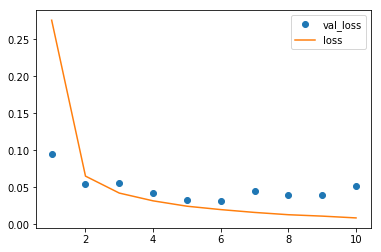

In [72]:
plt.plot(range(1, 11), history.history['val_loss'], 'o', label='val_loss')
plt.plot(range(1, 11), history.history['loss'], label='loss')
plt.legend()
plt.show()

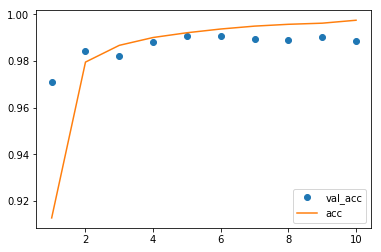

In [73]:
plt.plot(range(1, 11), history.history['val_acc'], 'o', label='val_acc')
plt.plot(range(1, 11), history.history['acc'], label='acc')
plt.legend()
plt.show()

In [39]:
import imageio as iio

In [118]:
img_array = iio.imread('mnist_data/test_7.png', as_gray=True)
img_data = (255.5 - img_array.reshape(784)) / 255.5 * 0.99 + 0.01

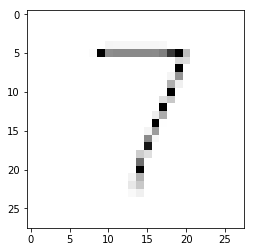

In [119]:
plt.imshow(img_data.reshape((28, 28)), cmap='Greys', interpolation='None')

In [79]:
test_inputs[0].reshape(1, 28, 28, 1).shape

(1, 28, 28, 1)

In [121]:
np.argmax(model1.predict(img_data.reshape(1, 28, 28, 1)))

7

In [120]:
model1.predict(img_data.reshape(1, 28, 28, 1))

array([[2.22625706e-04, 6.28107600e-03, 1.93911232e-03, 2.78628035e-03,
        1.21794865e-05, 7.25829841e-06, 5.53459110e-08, 9.88425374e-01,
        4.17668707e-05, 2.84295442e-04]], dtype=float32)

In [124]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                36928     
__________